In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
plt.style.use('plotting')

In [2]:
sample = np.loadtxt('M31analogs_halo_props_TNG100_revised.txt') 
print(sample[0], len(sample))

ids = sample[:,0]
halo_mass = sample[:,7]*1e10/0.704
stellar_mass = sample[:,8]*1e10/0.704
vmax = sample[:,9]
subhalomass = np.loadtxt('M31analogs_halo_props_TNG100_revised_subhalomass.txt')[:,10]*1e10/0.704

[ 4.02293000e+05  2.87754863e+04  5.62649414e+04  3.97450469e+04
 -4.64207077e+01 -1.47345963e+02  1.70618423e+02  1.48400421e+02
  4.13184738e+00  2.06390656e+02] 215


Text(0.5, 0, '$M_{vir}\\, \\, [M_{\\odot}]$')

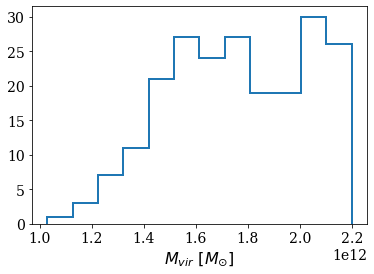

In [3]:
plt.figure()
plt.hist(halo_mass, bins = 12, histtype='step', lw=2)
plt.xlabel(r'$M_{vir}\, \, [M_{\odot}]$')

Text(0.5, 0, '$M_{*}\\, \\, [M_{\\odot}]$')

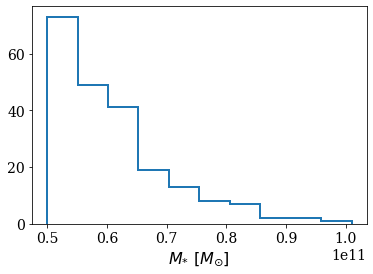

In [4]:
plt.figure()
plt.hist(stellar_mass, bins = 10, histtype='step', lw=2)
plt.xlabel(r'$M_{*}\, \, [M_{\odot}]$')

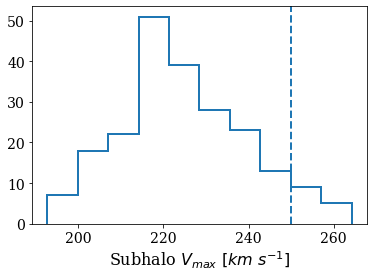

In [5]:
plt.figure()
plt.hist(vmax, bins = 10, histtype='step', lw=2)
plt.xlabel(r'Subhalo $V_{max}\,\, [km \, \, s^{-1}]$')
plt.axvline(x=250, ls='--')

In [6]:
mergers = np.loadtxt('M31analogs_merger_props_TNG100_revised.txt') 
last_maj = mergers[:,2]
num_maj = mergers[:,3]
num_min = mergers[:,4]

8.06560019250075


(-0.2, 14.0)

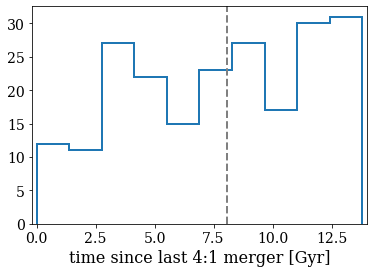

In [7]:
plt.figure()
plt.hist(last_maj, bins=10, histtype='step', lw=2)
plt.xlabel('time since last 4:1 merger [Gyr]')
print(np.median(last_maj))
plt.axvline(x=np.median(last_maj), ls='--', color='gray')
plt.xlim(-0.2,14.)

4.0 3.0 7.0 24.0


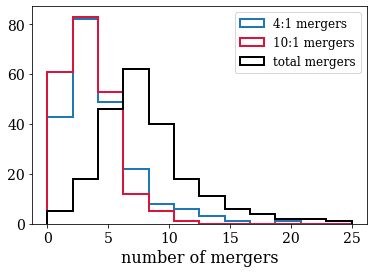

In [8]:
plt.figure()
tot = num_maj+num_min
print(num_maj[0], num_min[0], tot[0], np.max(tot))
plt.hist(num_maj, bins=12, range=(0,25), histtype='step', lw=2, label='4:1 mergers')
plt.hist(num_min, bins=12, range=(0,25), histtype='step', color='crimson', lw=2, label='10:1 mergers')
plt.hist(tot, bins=12,range=(0,25), histtype='step', color='k', lw=2, label='total mergers')
plt.xlabel('number of mergers')
plt.legend(loc='upper right')


In [9]:
print(vmax[num_maj>10])
print(num_maj[vmax < 200])

[223.39108276 219.04237366 223.95063782 234.98887634 248.65977478
 225.99510193 216.83578491 216.07565308 221.92431641 222.85983276
 231.59451294]
[5. 8. 5. 4. 7. 5. 2.]


Text(0.5, 0, '$M_{sub}\\, \\, [M_{\\odot}]$')

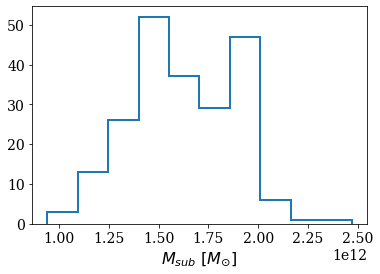

In [10]:
plt.figure()
plt.hist(subhalomass, bins = 10, histtype='step', lw=2)
plt.xlabel(r'$M_{sub}\, \, [M_{\odot}]$')

941013747995.55 2468986294486.306
[402293. 430683.]


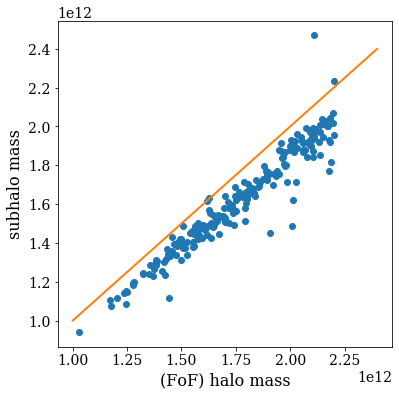

In [13]:
plt.figure(figsize=(6,6))
plt.plot(halo_mass, subhalomass, 'o', ms=6)
print(np.min(subhalomass), np.max(subhalomass))
plt.plot(np.arange(1e12,2.5e12,1e11), np.arange(1e12,2.5e12,1e11))
plt.xlabel('(FoF) halo mass')
plt.ylabel('subhalo mass')
print(ids[subhalomass>2.2e12])

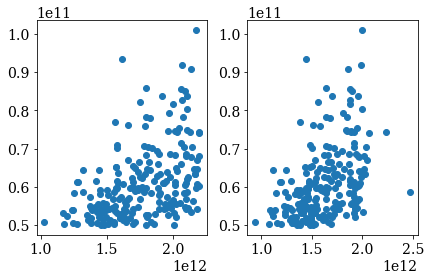

In [12]:
plt.figure()
plt.subplot(121)
plt.plot(halo_mass, stellar_mass, 'o', ms=6)

plt.subplot(122)
plt.plot(subhalomass, stellar_mass, 'o', ms=6)
plt.tight_layout()